In [3]:
#Description: Building a LSTM model using Keras and TensorFlow for COVID-19 prediction

In [6]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Importing Dataset
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_india = df.loc[df["Country/Region"] == 'India']
df1_transposed = df_india.T
df_india = df1_transposed.loc['1/22/20':]
df_india

,131
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
5/18/20,100328
5/19/20,106475
5/20/20,112028
5/21/20,118226


In [10]:
# Spitting into train and test data
train = df_india
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

In [132]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator( train, train, length=n_input, batch_size=6 )

model = Sequential()
model.add( LSTM( 180, activation = 'relu', input_shape = ( n_input, n_features ) ) )
model.add( Dropout(0.10) )
model.add( Dense(1) )
model.compile(optimizer='adam', loss='mse')

model.fit_generator( generator, epochs=250)

Epoch 1/250
19/19 [==============================] - 0s 24ms/step - loss: 0.0973
Epoch 2/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0420
Epoch 3/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 4/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 5/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 6/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 7/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 8/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 9/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 10/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 11/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 12/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 13/250
19/19 [================

19/19 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 196/250
19/19 [==============================] - 0s 8ms/step - loss: 3.1218e-04
Epoch 197/250
19/19 [==============================] - 0s 8ms/step - loss: 5.4000e-04
Epoch 198/250
19/19 [==============================] - 0s 8ms/step - loss: 2.3482e-04
Epoch 199/250
19/19 [==============================] - 0s 10ms/step - loss: 5.0672e-04
Epoch 200/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 201/250
19/19 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 202/250
19/19 [==============================] - 0s 9ms/step - loss: 7.8952e-04
Epoch 203/250
19/19 [==============================] - 0s 9ms/step - loss: 6.1309e-04
Epoch 204/250
19/19 [==============================] - 0s 9ms/step - loss: 3.2500e-04
Epoch 205/250
19/19 [==============================] - 0s 8ms/step - loss: 5.2788e-04
Epoch 206/250
19/19 [==============================] - 0s 8ms/step - loss: 9.11

In [133]:
pred_list = []

batch = train[-n_input:].reshape((1,n_input,n_features))

for i in range(70):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis=1)
    
rng = pd.date_range('2020-05-23', periods=70, freq='D')
ix = pd.DataFrame({'Date': rng})
ix.set_index('Date')

df_india_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=ix[-70:].index, columns=['Predictions'])
#df_final = pd.concat([df_india, df_india_predict],axis=1)

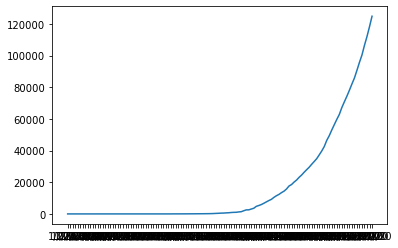

In [134]:
plt.plot(df_india)

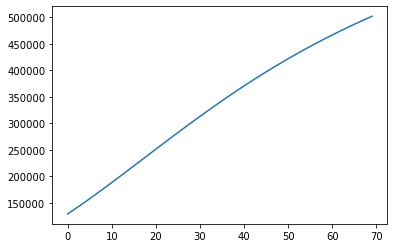

In [135]:
plt.plot(df_india_predict)